In [167]:
import pandas as pd
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

import os

from factor_analyzer import FactorAnalyzer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

import scipy.stats as stats

In [168]:
survey = pd.read_sas(r'Dataset_New_2022.sas7bdat',format='sas7bdat')

In [169]:
survey.shape

(180, 85)

In [170]:
survey.columns

Index(['Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8',
       'Q2_9', 'Q2_10', 'Q2_11', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9_1', 'Q9_2',
       'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4',
       'Q10_5', 'Q10_6', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q12_1', 'Q12_2',
       'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10',
       'Q13', 'Q14', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6',
       'Q15_7', 'Q15_8', 'Q15_9', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8',
       'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'FAC1_1', 'FAC2_1', 'FAC3_1',
       'FAC4_1', 'FAC5_1', 'FAC6_1', 'FAC7_1', 'FAC8_1', 'CLU5_1', 'CLU6_2',
       'QCL_1', 'ID'],
      dtype='object')

In [171]:
survey.sample(n=5)

,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,...,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1,FAC8_1,CLU5_1,CLU6_2,QCL_1,ID
19,1.0,4.0,8.0,9.0,8.0,9.0,7.0,8.0,7.0,8.0,...,-0.74520,1.30752,0.84691,-1.13151,0.92948,-0.81955,2.0,2.0,2.0,84.0
42,3.0,7.0,4.0,10.0,8.0,10.0,8.0,8.0,9.0,9.0,...,-3.48298,-0.13621,0.34622,1.47862,0.99769,-0.29959,1.0,1.0,4.0,76.0
153,0.0,8.0,9.0,7.0,7.0,7.0,8.0,2.0,1.0,9.0,...,0.42927,-0.21419,-0.26107,0.58386,1.09582,0.31595,1.0,4.0,1.0,51.0
78,2.0,9.0,8.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,...,0.41172,0.83165,0.59007,-0.18703,0.94320,0.54249,3.0,3.0,3.0,142.0
145,10.0,2.0,1.0,6.0,3.0,7.0,6.0,7.0,8.0,9.0,...,-0.94767,-0.91178,-1.62954,0.59577,1.00925,-3.49668,4.0,5.0,4.0,65.0


We first determine which questions might be useful/relevant to find out hidden factors.

In [172]:
relevant_questions = [
       'Q2_1','Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8','Q2_9', 'Q2_10', 'Q2_11',
       'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4',
]

relevant_survey = survey[relevant_questions]

<Axes: >

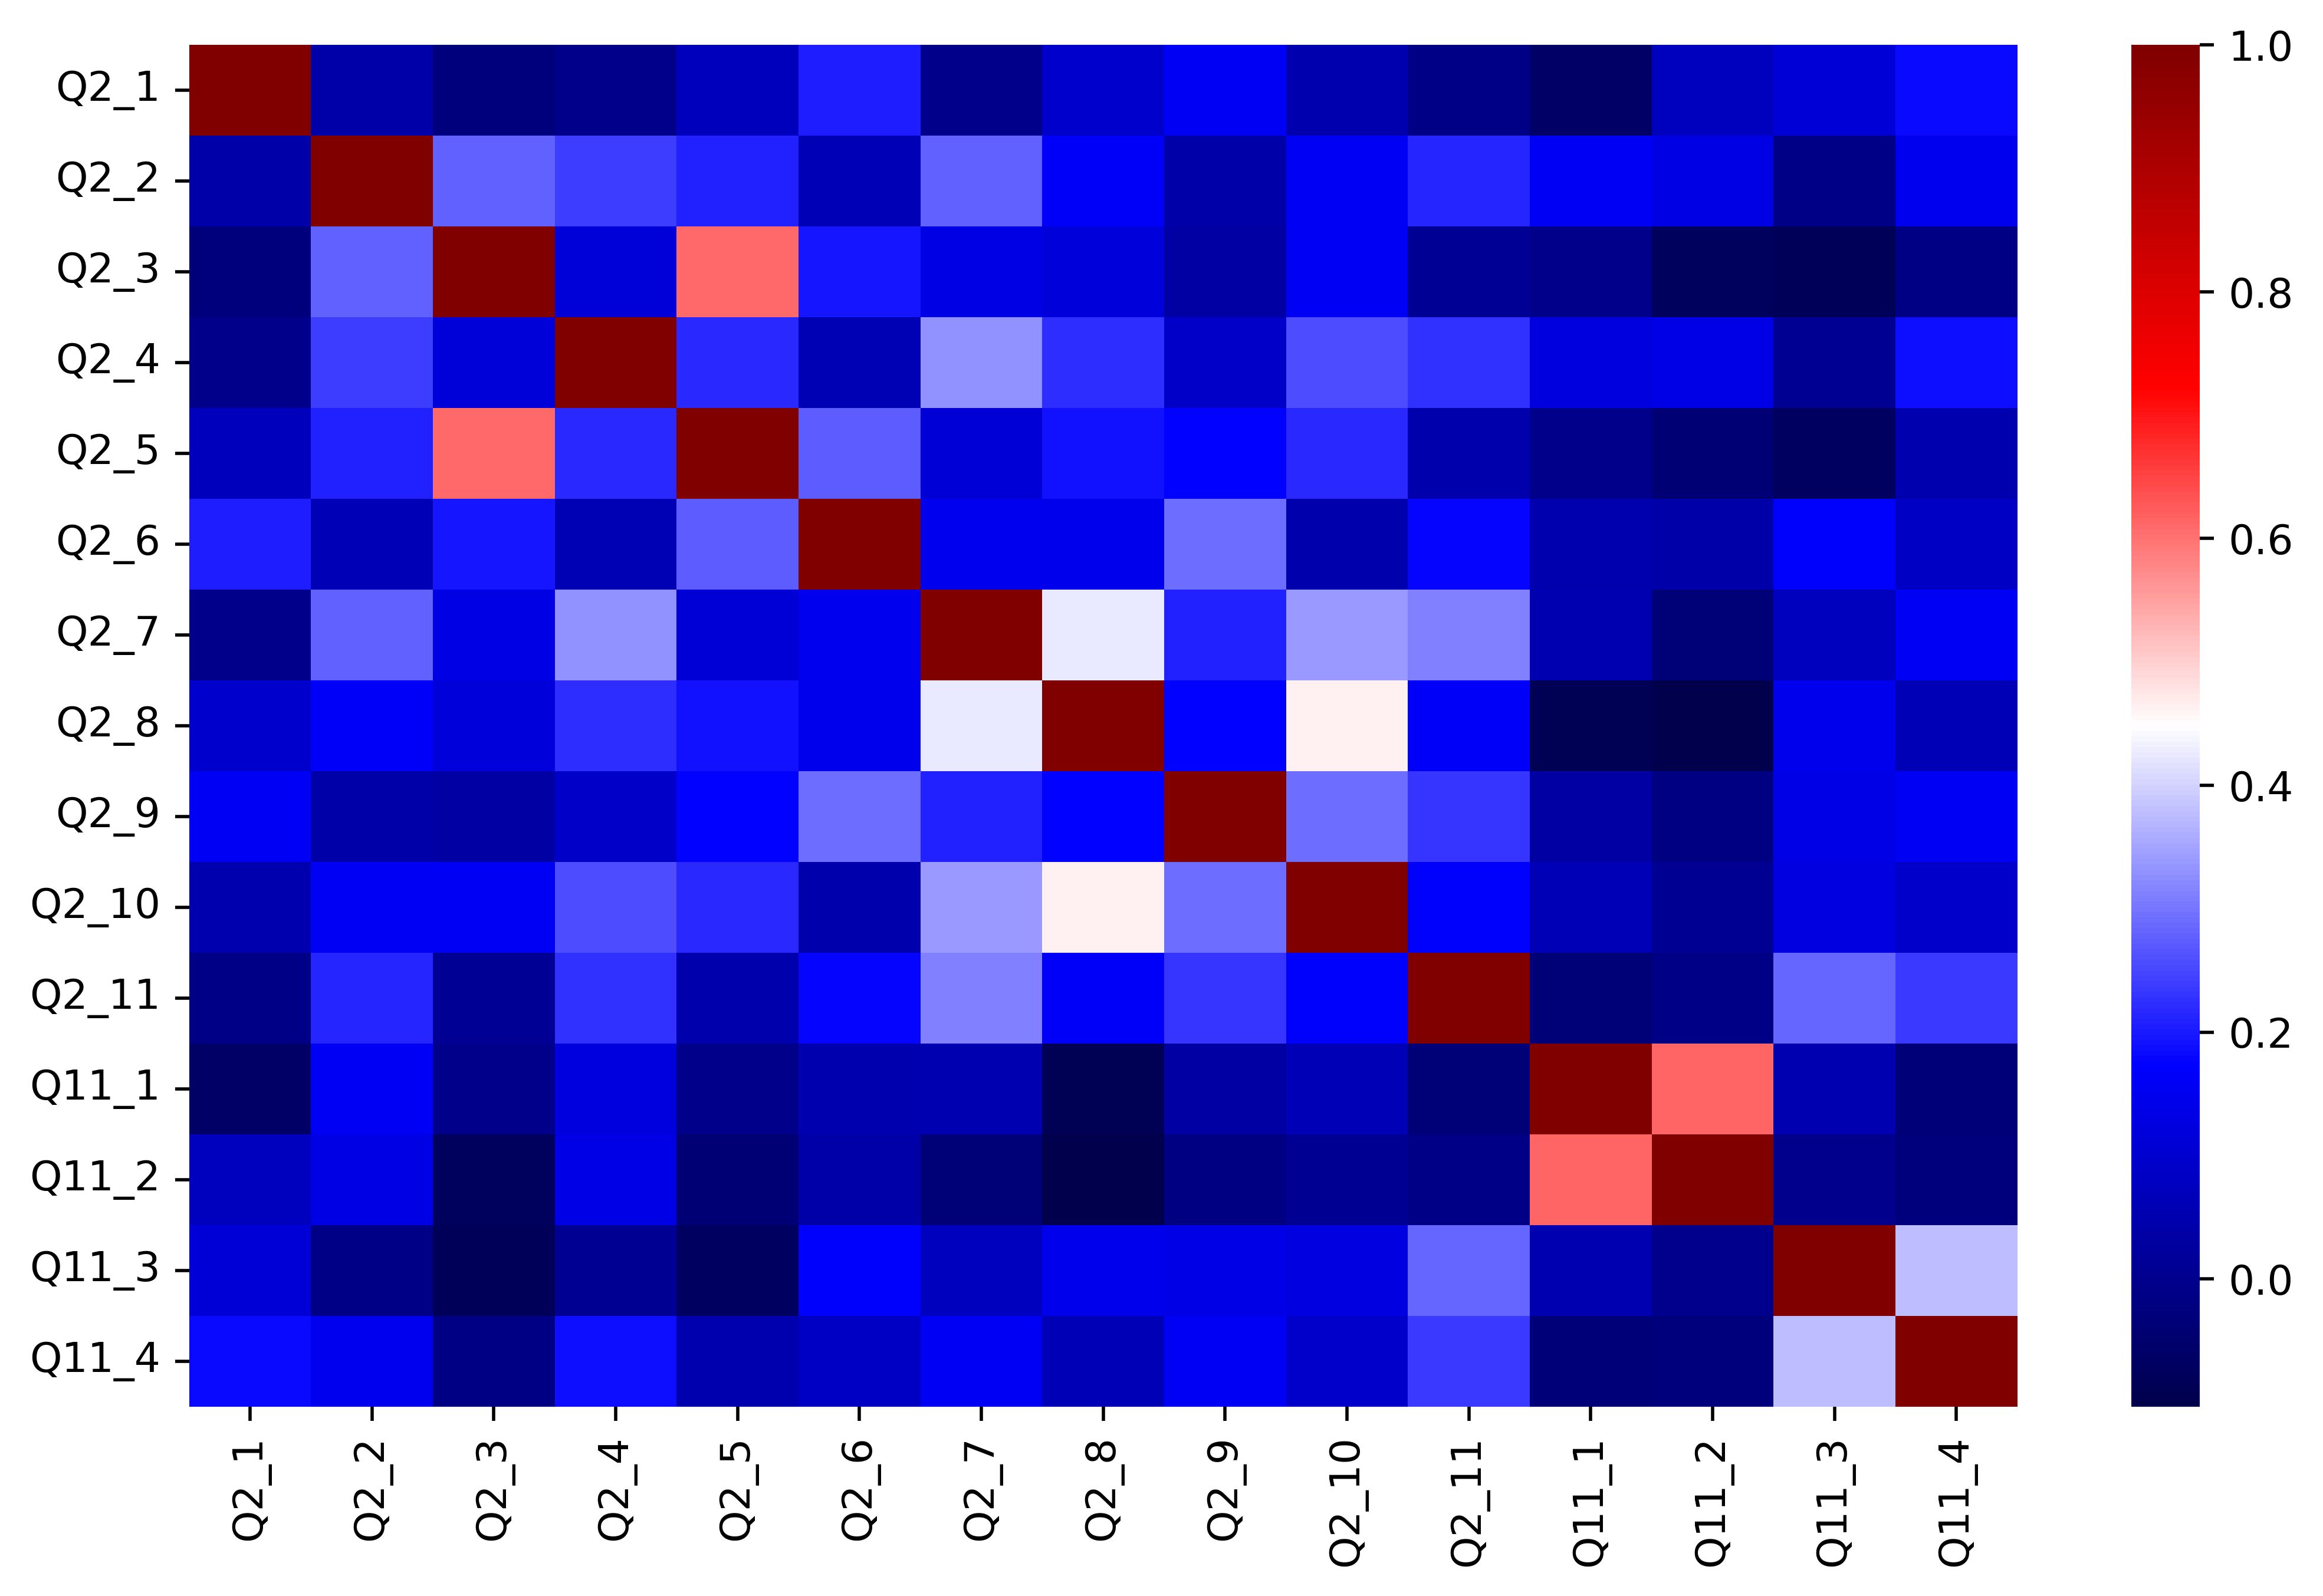

In [173]:
correlations = relevant_survey.corr()
plt.rcParams['figure.dpi'] = 500
plt.figure(figsize=(10,6))
sb.heatmap(correlations, cmap="seismic", annot=False)

In [174]:
final_survey = relevant_survey.drop(columns=["Q2_1"])

In [175]:
final_survey.isna().sum()

Q2_2     0
Q2_3     0
Q2_4     0
Q2_5     0
Q2_6     0
Q2_7     0
Q2_8     0
Q2_9     0
Q2_10    0
Q2_11    0
Q11_1    0
Q11_2    0
Q11_3    0
Q11_4    0
dtype: int64

In [176]:
final_survey.shape

(180, 14)

In [177]:
np.random.seed(33)
## First I create an object with the features I want
fa_pca = FactorAnalyzer(rotation=None, n_factors=14, method='principal')
## Then the analysis is applied to a given dataset
fa_pca.fit(final_survey)

FactorAnalyzer(method='principal', n_factors=14, rotation=None,
               rotation_kwargs={})

In [178]:
ev, _ = fa_pca.get_eigenvalues()
# ev: The eigenvalues

display(ev)


array([2.96923945, 1.72017102, 1.6860506 , 1.27454631, 1.10451847,
       0.88053275, 0.80129325, 0.74159599, 0.66217081, 0.55432484,
       0.4712763 , 0.45038668, 0.35073482, 0.33315871])

[Text(0.5, 0, 'Factor'), Text(0, 0.5, 'Eigenvalue')]

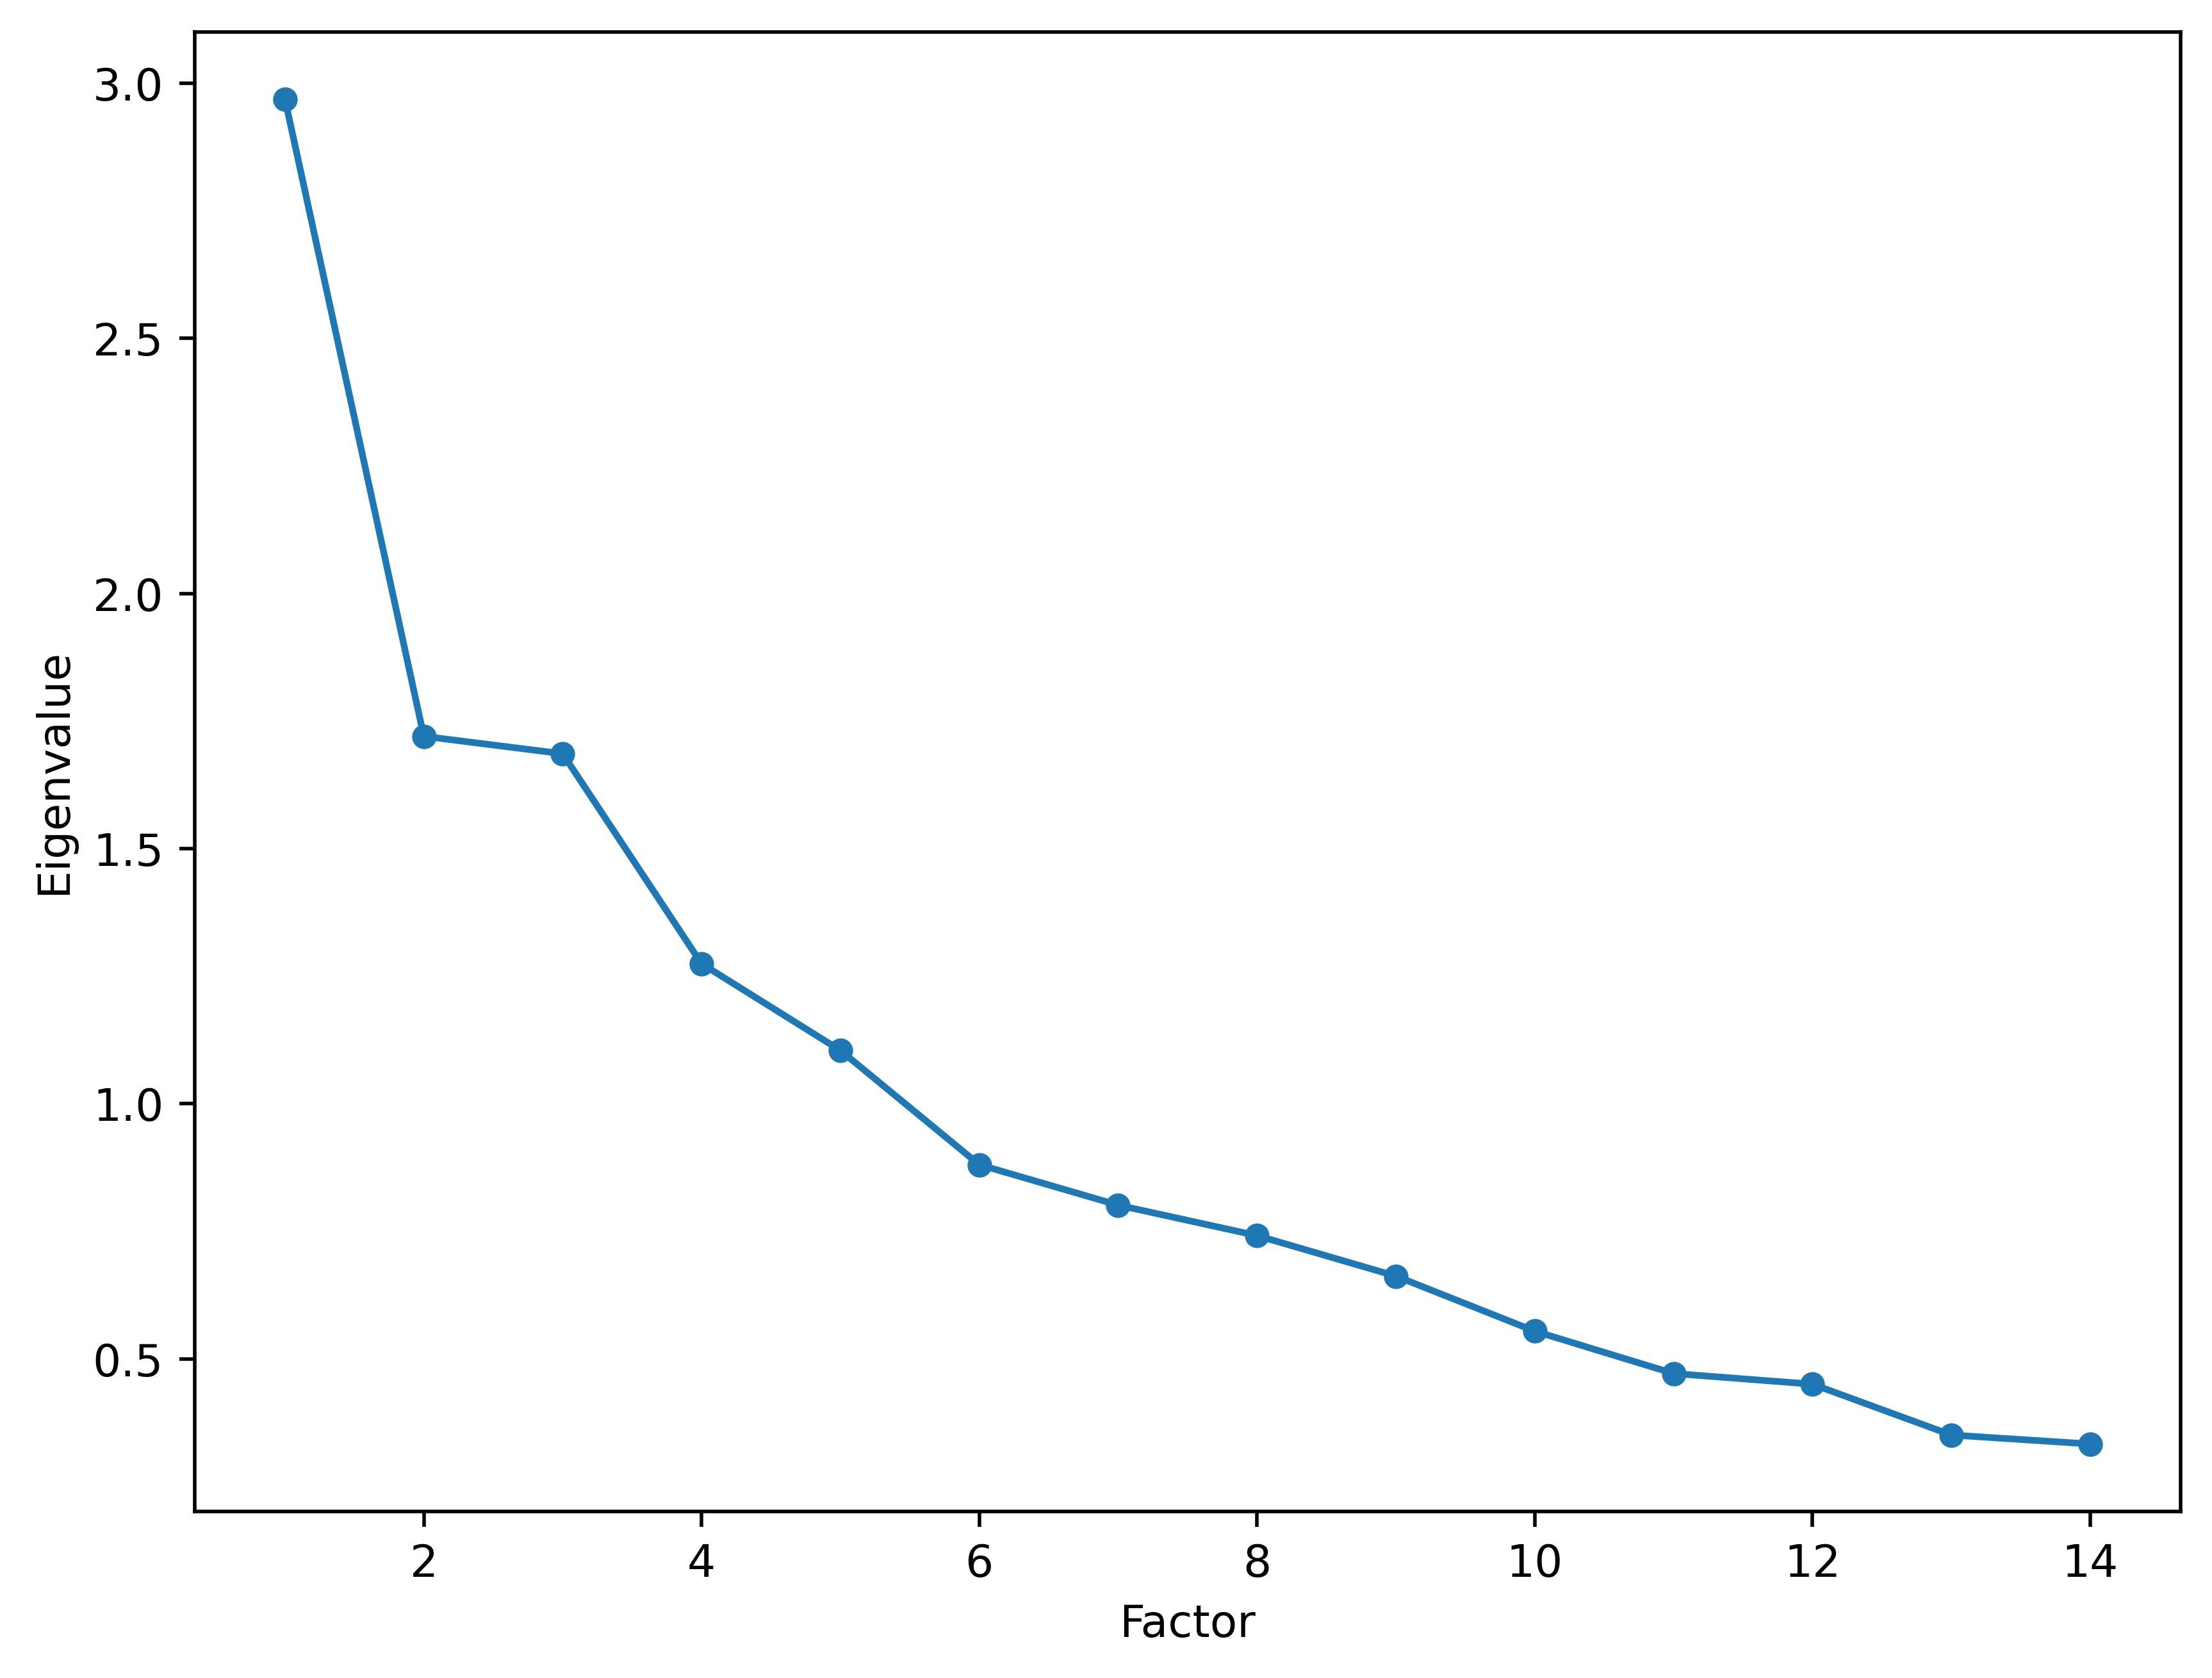

In [179]:
ev, _ = fa_pca.get_eigenvalues()
plt.rcParams['figure.dpi'] = 500
plt.figure(figsize=(8,6))
sb.scatterplot(x=range(1,final_survey.shape[1]+1),y=ev)
ax = sb.lineplot(x=range(1,final_survey.shape[1]+1), y=ev)
ax.set(xlabel="Factor", ylabel = "Eigenvalue")

In [180]:
###Creo un dataset variance_data con info prodotte dall funzione FactorAnalyzer
variance_summary_data = {
    'Variance':fa_pca.get_factor_variance()[0],
    'Proportion Var':fa_pca.get_factor_variance()[1],
    'Cumulative Var': fa_pca.get_factor_variance()[2]
}
variance_summary = pd.DataFrame(data=variance_summary_data)
variance_summary

,Variance,Proportion Var,Cumulative Var
0,2.969239,0.212089,0.212089
1,1.720171,0.122869,0.334958
2,1.686051,0.120432,0.455390
3,1.274546,0.091039,0.546429
4,1.104518,0.078894,0.625323
5,0.880533,0.062895,0.688218
6,0.801293,0.057235,0.745454
7,0.741596,0.052971,0.798425
8,0.662171,0.047298,0.845723
9,0.554325,0.039595,0.885317


In [181]:
variance_summary[['Variance','Proportion Var']].sum()

Variance          14.0
Proportion Var     1.0
dtype: float64

The first five factors explain 69.8% of the variance, are about 1/3 of the original variables, and have eigenvalue>1

Let's choose the solution with seven factors, but still without rotation. 

In [182]:
#first 5 1

In [183]:
np.random.seed(33)
n_factors = 5
##The object with the result of the PCA without rotation
fa_no_rotation = FactorAnalyzer(n_factors, rotation=None, method='principal')

fa_no_rotation.fit(final_survey)

FactorAnalyzer(method='principal', n_factors=5, rotation=None,
               rotation_kwargs={})

In [184]:
###Come prima, estraggo gli eigenvalue dall'oggetto fa_no_rotation che ha le componenti principali
ev, _ = fa_no_rotation.get_eigenvalues()
###Mi creo una partizione dove salvo solo i valori degli eigenvalue dei primi 5 fattori
df_eigenvals = pd.DataFrame({"Eigenvalues":ev}).iloc[:5]

###Creo un output variance_data per riassumere le info prodotte dall funzione FactorAnalyzer riguardo la varianza
variance_data = {
    'Variance':fa_no_rotation.get_factor_variance()[0],
    'Proportion Var':fa_no_rotation.get_factor_variance()[1],
    'Cumulative Var': fa_no_rotation.get_factor_variance()[2]
}
### Creo un dataset variance_data con info prodotte dall funzione FactorAnalyzer
df_variance = pd.DataFrame(data=variance_data)

### Metto assieme le info di autovalori e varianza e dei primi 7 fattori estratti per facilitare l'interpretazione.
df_tot=df_eigenvals.join(df_variance)
df_tot

,Eigenvalues,Variance,Proportion Var,Cumulative Var
0,2.969239,2.969239,0.212089,0.212089
1,1.720171,1.720171,0.122869,0.334958
2,1.686051,1.686051,0.120432,0.455390
3,1.274546,1.274546,0.091039,0.546429
4,1.104518,1.104518,0.078894,0.625323


In [185]:
# Communalities
communalities = fa_no_rotation.get_communalities()
df_communalities = pd.DataFrame({"Communalities":communalities})
display(df_communalities)

,Communalities
0,0.561077
1,0.753808
2,0.471994
3,0.746214
4,0.614392
5,0.562890
6,0.628718
7,0.562704
8,0.603656
9,0.470337


In [186]:
## Factor loading matrix extraction from the object fa_no_rotation plus loadings rounding
unrotated_factor_pattern = pd.DataFrame(
    data=np.round(100*fa_no_rotation.loadings_,0), 
    index=final_survey.columns, 
    columns=["Factor_" + str(i+1) for i in range(n_factors)]
)
display(unrotated_factor_pattern)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Q2_2,48.0,26.0,-19.0,-12.0,46.0
Q2_3,42.0,-10.0,-69.0,25.0,19.0
Q2_4,53.0,23.0,-3.0,-29.0,24.0
Q2_5,51.0,-10.0,-62.0,31.0,4.0
Q2_6,41.0,-2.0,-4.0,61.0,-28.0
Q2_7,65.0,-2.0,11.0,-36.0,-1.0
Q2_8,60.0,-22.0,3.0,-37.0,-28.0
Q2_9,47.0,-8.0,18.0,28.0,-48.0
Q2_10,61.0,-4.0,2.0,-33.0,-34.0
Q2_11,51.0,-4.0,40.0,7.0,21.0


In [187]:
## Repeat the previous call adding the request of performing a varimax rotation (minimize the number of variables highly 
## correlated with the same factor)
np.random.seed(33)
fa = FactorAnalyzer(n_factors=5, rotation="varimax", method='principal')
fa.fit(final_survey)

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

In [188]:
rotated_factor_pattern_nofilter = pd.DataFrame(
    data=np.round(100*fa.loadings_,0), 
    index=final_survey.columns, 
    columns=["Factor_" + str(i+1) for i in range(n_factors)]
)
display(rotated_factor_pattern_nofilter)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Q2_2,27.0,25.0,47.0,-33.0,30.0
Q2_3,6.0,-7.0,86.0,6.0,-7.0
Q2_4,48.0,23.0,25.0,-24.0,25.0
Q2_5,13.0,-4.0,82.0,23.0,-5.0
Q2_6,-1.0,8.0,32.0,68.0,19.0
Q2_7,71.0,2.0,10.0,-3.0,23.0
Q2_8,76.0,-16.0,5.0,15.0,1.0
Q2_9,31.0,3.0,1.0,67.0,14.0
Q2_10,75.0,4.0,5.0,20.0,-2.0
Q2_11,29.0,-1.0,3.0,9.0,61.0


In [189]:
rotated_factor_pattern=rotated_factor_pattern_nofilter.copy()

rotated_factor_pattern[abs(rotated_factor_pattern) < 40] = ""
rotated_factor_pattern.sort_values(by=list(rotated_factor_pattern.columns), ascending=True, inplace=True)
display(rotated_factor_pattern)

C:\Users\Matteo\AppData\Local\Temp\ipykernel_13340\4162317709.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rotated_factor_pattern[abs(rotated_factor_pattern) < 40] = ""


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Q2_4,48.0,,,,
Q2_7,71.0,,,,
Q2_10,75.0,,,,
Q2_8,76.0,,,,
Q11_1,,88.0,,,
Q11_2,,89.0,,,
Q2_2,,,47.0,,
Q2_5,,,82.0,,
Q2_3,,,86.0,,
Q2_9,,,,67.0,


In [190]:
## Add the question labels to our pattern to get an insight

In [191]:
dict_labels = {
    "Q2_2": "rate the importance of Online purchase when choosing the movie theatre",
    "Q2_3": "rate the importance of Discounts  when choosing the movie theatre",
    "Q2_4": "rate the importance of Snack Offer when choosing the movie theatre",
    "Q2_5": "rate the importance of Price when choosing the movie theatre",
    "Q2_6": "rate the importance of Timetable when choosing the movie theatre",
    "Q2_7": "rate the importance of Technology equipped in cinema when choosing the movie theatre",
    "Q2_8": "rate the importance of Cleanliness when choosing the movie theatre",
    "Q2_9": "rate the importance of Choice of films shown when choosing the movie theatre",
    "Q2_10": "rate the importance of Comfort of the seats  when choosing the movie theatre",
    "Q2_11": "rate the importance of  Availability of films in original language when choosing the movie theatre", 
    "Q11_1": "It’s hard to watch the subtitles and to catch up with the film",
    "Q11_2": "I have little language knowledge to support ",
    "Q11_3": "It’s hard to find a cinema offering original versions' films",
    "Q11_4": "There is a limited number of movie sessions per day"
}
df_labels = pd.DataFrame.from_dict(dict_labels, orient='index', columns=["label"])

In [192]:
pd.options.display.max_colwidth=300
rotated_factor_pattern_labeled = (
    df_labels
    .join(rotated_factor_pattern)
    .sort_values(by=list(rotated_factor_pattern), ascending=True)
)
display(rotated_factor_pattern_labeled)

,label,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Q2_4,rate the importance of Snack Offer when choosing the movie theatre,48.0,,,,
Q2_7,rate the importance of Technology equipped in cinema when choosing the movie theatre,71.0,,,,
Q2_10,rate the importance of Comfort of the seats when choosing the movie theatre,75.0,,,,
Q2_8,rate the importance of Cleanliness when choosing the movie theatre,76.0,,,,
Q11_1,It’s hard to watch the subtitles and to catch up with the film,,88.0,,,
Q11_2,I have little language knowledge to support,,89.0,,,
Q2_2,rate the importance of Online purchase when choosing the movie theatre,,,47.0,,
Q2_5,rate the importance of Price when choosing the movie theatre,,,82.0,,
Q2_3,rate the importance of Discounts when choosing the movie theatre,,,86.0,,
Q2_9,rate the importance of Choice of films shown when choosing the movie theatre,,,,67.0,


In [193]:
#scegliamo il fattore da assegnare alla variabile prendendo quello con valore assoluto più alto
rotated_factor_pattern_nofilter.abs().idxmax(axis="columns",skipna=True).sort_values()

Q2_4     Factor_1
Q2_7     Factor_1
Q2_8     Factor_1
Q2_10    Factor_1
Q11_1    Factor_2
Q11_2    Factor_2
Q2_2     Factor_3
Q2_3     Factor_3
Q2_5     Factor_3
Q2_6     Factor_4
Q2_9     Factor_4
Q2_11    Factor_5
Q11_3    Factor_5
Q11_4    Factor_5
dtype: object

In [194]:
# 2. Cluster Analysis ###

In [195]:
## Running the above code, we will have the object FA which host informations needed to perform a PCA to extract 7 factors with 
##Varimax rotation.

new_variables = fa.transform(final_survey)
## We apply the method .transform to create a new dataset with the factors: each observation will have seven variables:
## the corrensponding factor values calculated on the basis of the 24 original variables in final_survey

## The loops gives a new name to the added factor: Factor+cardinal number
transformed_df = pd.DataFrame(
    data = new_variables,
    columns=["Factor_" + str(i+1) for i in range(n_factors)]
)

In [196]:
display(final_survey.shape)
final_survey.head(100)

(180, 14)

,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q2_11,Q11_1,Q11_2,Q11_3,Q11_4
0,8.0,10.0,1.0,9.0,8.0,10.0,9.0,10.0,6.0,7.0,1.0,1.0,8.0,8.0
1,6.0,6.0,4.0,8.0,8.0,8.0,8.0,8.0,9.0,8.0,4.0,2.0,9.0,7.0
2,4.0,9.0,4.0,7.0,9.0,8.0,5.0,9.0,7.0,3.0,3.0,2.0,5.0,8.0
3,4.0,6.0,2.0,9.0,9.0,5.0,10.0,9.0,7.0,8.0,8.0,5.0,7.0,9.0
4,4.0,4.0,6.0,10.0,8.0,3.0,4.0,9.0,5.0,6.0,8.0,7.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,8.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,3.0,2.0,8.0,8.0
96,10.0,10.0,2.0,10.0,10.0,7.0,7.0,10.0,9.0,9.0,1.0,1.0,8.0,10.0
97,1.0,1.0,6.0,7.0,9.0,8.0,10.0,10.0,9.0,10.0,3.0,1.0,9.0,10.0
98,3.0,10.0,1.0,10.0,10.0,4.0,9.0,10.0,10.0,3.0,2.0,1.0,7.0,10.0


In [197]:
transformed_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
0,0.259680,-1.772125,0.749550,0.247167,0.762876
1,0.599433,-0.820296,-0.431452,-0.205652,0.717581
2,-0.537079,-0.922832,0.236133,0.087168,-0.160203
3,-0.042837,0.253504,-0.337454,1.007728,0.355215
4,-1.465598,1.207363,-0.090413,0.337385,0.005881
...,...,...,...,...,...
175,0.947743,0.594670,-0.814071,-0.556212,1.109724
176,-0.521031,-1.840367,-1.311097,-0.213269,-1.339334
177,0.723352,-1.483184,-0.152791,0.196010,0.609684
178,-0.206391,-0.450356,0.932604,1.718461,-3.106498


In [198]:
display(transformed_df.shape)
transformed_df.head(300)

(180, 5)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
0,0.259680,-1.772125,0.749550,0.247167,0.762876
1,0.599433,-0.820296,-0.431452,-0.205652,0.717581
2,-0.537079,-0.922832,0.236133,0.087168,-0.160203
3,-0.042837,0.253504,-0.337454,1.007728,0.355215
4,-1.465598,1.207363,-0.090413,0.337385,0.005881
...,...,...,...,...,...
175,0.947743,0.594670,-0.814071,-0.556212,1.109724
176,-0.521031,-1.840367,-1.311097,-0.213269,-1.339334
177,0.723352,-1.483184,-0.152791,0.196010,0.609684
178,-0.206391,-0.450356,0.932604,1.718461,-3.106498


In [199]:
Factor_means = []
Factor_stds = []

for i in range(5):
    Factor_means.append(np.mean(transformed_df.iloc[:,i]))
    Factor_stds.append(np.std(transformed_df.iloc[:,i]))

print(Factor_means)
print(Factor_stds)
print(np.round(Factor_means))
print(np.round(Factor_stds))

[-2.4671622769447922e-17, -2.960594732333751e-17, 2.960594732333751e-17, 3.305997451106022e-16, 7.401486830834377e-17]
[1.0000000000000007, 1.0, 1.0, 1.0, 1.0]
[-0. -0.  0.  0.  0.]
[1. 1. 1. 1. 1.]


In [200]:
transformed_df = transformed_df.join(relevant_survey[["Q2_1"]])

transformed_df["Q2_1_std"] = (
    (transformed_df["Q2_1"]-transformed_df["Q2_1"].mean())/transformed_df["Q2_1"].std()
)

transformed_df.drop(columns=["Q2_1"],inplace=True) # we do not need Q17 anymore


print(transformed_df["Q2_1_std"].mean()) #sanity-check of the mean of the standardized variable
print(transformed_df["Q2_1_std"].std()) #sanity-check of the std of the standardized variable

2.1217595581725215e-16
0.9999999999999999


In [201]:
# This is the dataset we will use to do the clustering analysis
transformed_df.head()


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Q2_1_std
0,0.259680,-1.772125,0.749550,0.247167,0.762876,1.348410
1,0.599433,-0.820296,-0.431452,-0.205652,0.717581,0.411291
2,-0.537079,-0.922832,0.236133,0.087168,-0.160203,-0.057268
3,-0.042837,0.253504,-0.337454,1.007728,0.355215,0.411291
4,-1.465598,1.207363,-0.090413,0.337385,0.005881,-1.462947


In [202]:
transformed_df.isna().sum()

Factor_1    0
Factor_2    0
Factor_3    0
Factor_4    0
Factor_5    0
Q2_1_std    0
dtype: int64

In [203]:
# we take a random subset of data 
np.random.seed(42)
sample = transformed_df.sample(frac=0.33, replace=False)

print(len(sample))


59


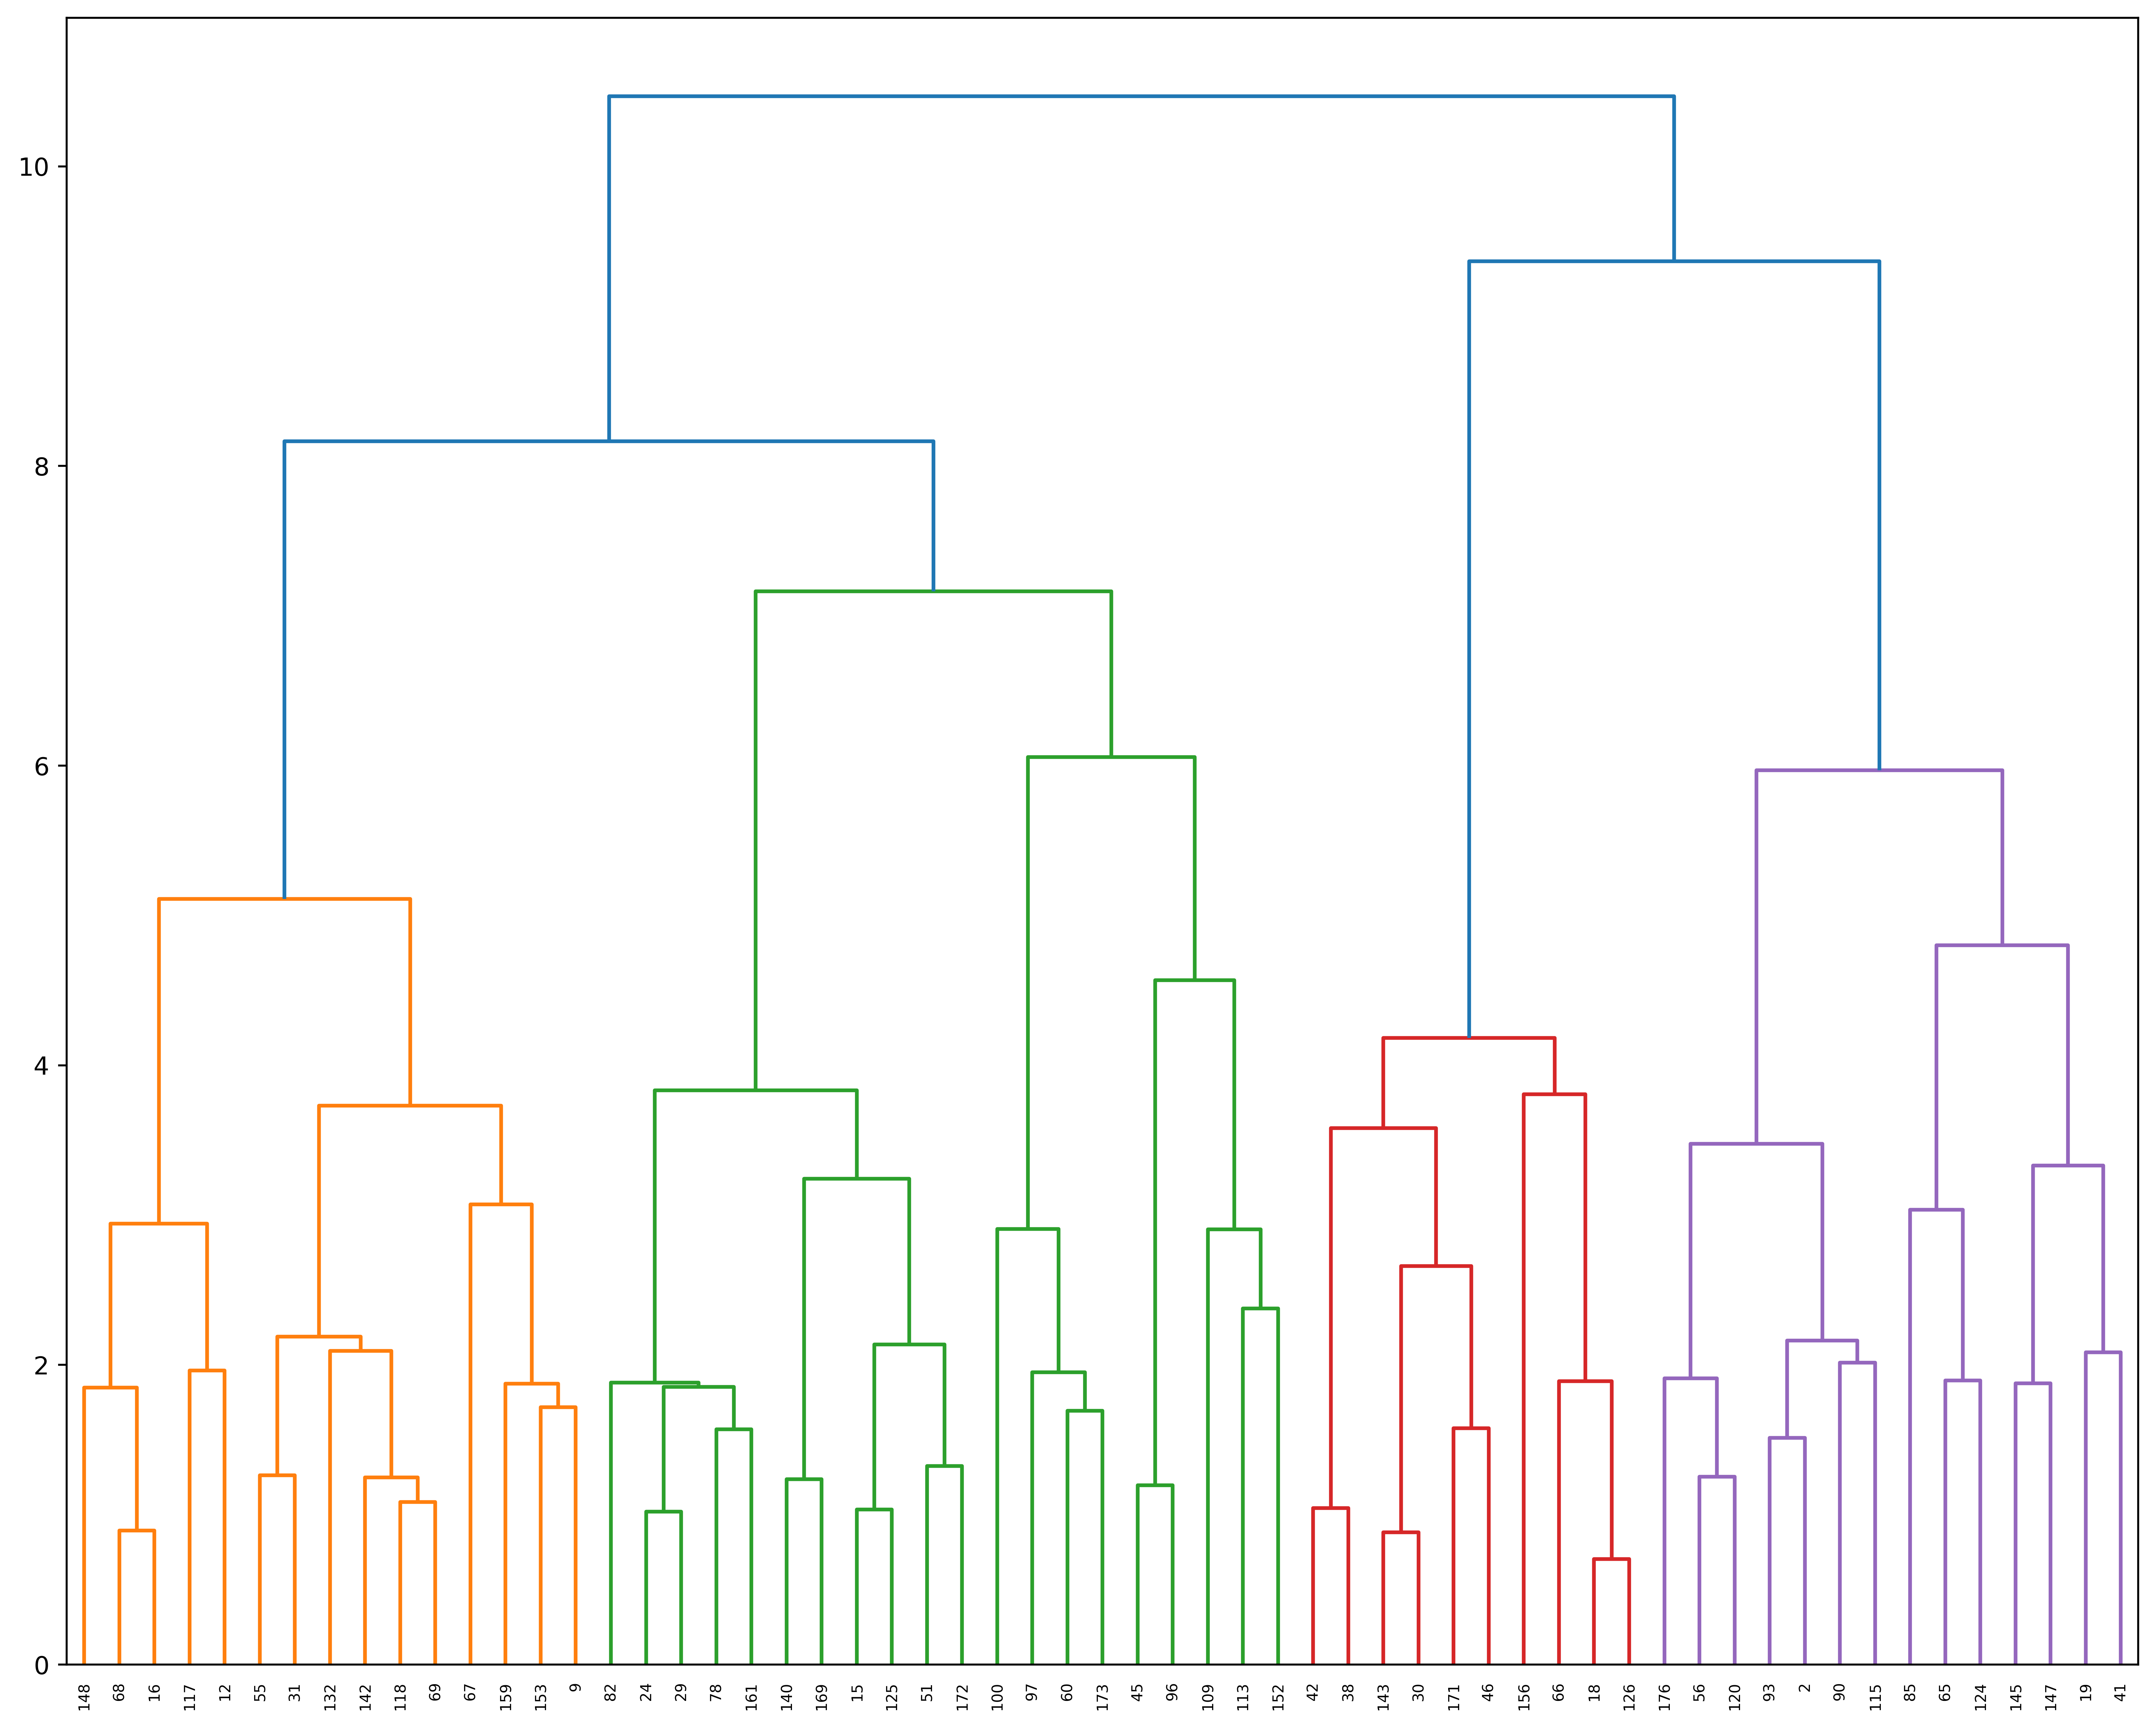

In [204]:
plt.figure(figsize=(15, 12))
np.random.seed(42) 
dendrogram = sch.dendrogram(
    sch.linkage(sample, method='ward'),
    orientation='top',
    labels= sample.index,
    distance_sort='ascending'
)

In [205]:
model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
model.fit(sample)
# add new column with cluster modality
sample["cluster_agg_ward"] = model.labels_
#print cluster distribution
sample["cluster_agg_ward"].value_counts(dropna=False)

cluster_agg_ward
0    20
3    15
1    14
2    10
Name: count, dtype: int64

In [206]:
sample.head()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Q2_1_std,cluster_agg_ward
19,0.491007,0.812587,0.764804,-1.168259,0.074452,-1.462947,1
42,1.264415,0.425198,0.870419,-0.072172,-2.093756,-0.057268,2
153,-1.661816,0.334999,0.665539,-1.108660,-0.263051,0.411291,3
78,1.116235,1.113238,0.589888,0.107312,0.234636,0.879851,0
145,-0.092350,-1.319417,-1.234185,0.087045,0.259255,-2.400066,1


In [207]:
centroids = sample.groupby("cluster_agg_ward").mean().to_numpy()
centroids

array([[ 0.40318826, -0.37863659, -0.25662739,  0.34059021,  0.72539028,
         0.57528706],
       [-0.19925611, -0.46247133,  0.04156994, -0.19990538, -0.69167602,
        -1.49641572],
       [-0.09120282,  1.01647912,  0.17321722,  0.67351734, -1.42364449,
         0.50500312],
       [-0.57266322,  0.2808338 , -0.24666754, -1.08689362,  0.05732643,
         0.44252851]])

In [208]:
km = KMeans(
    n_clusters=4, 
    init=centroids, ## we give the model the centroids we calculated above
    n_init=1,       # default 10 is overwritten with 1 when you pass initial centers explicitly
    random_state=123,
    max_iter=500,   ## Stop criterion 1: max number of iteration
    tol=0.0001      ## Stop criterion 2: limit in centroid changing 
).fit(transformed_df) ## Apply the model to the dataset with all the 203 observation 

## Have a look at centroids in final clusters
updated_centroids =km.cluster_centers_
updated_centroids


array([[ 0.39223412, -0.15725034, -0.08608757,  0.40869909,  0.66512703,
         0.41779897],
       [-0.01931415, -0.39473243, -0.03354506, -0.10542544, -0.49916138,
        -1.49050951],
       [-0.01932478,  0.50536588,  0.27763026,  0.60059897, -1.12799106,
         0.4112912 ],
       [-0.65723068,  0.19672813, -0.04446247, -1.11369842,  0.15380599,
         0.17129726]])

In [209]:
transformed_df['cluster_km'] = km.labels_
transformed_df['cluster_km'].value_counts(dropna=False, normalize=True)

cluster_km
0    0.400000
3    0.227778
1    0.188889
2    0.183333
Name: proportion, dtype: float64

In [210]:
transformed_df.head(10)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Q2_1_std,cluster_km
0,0.259680,-1.772125,0.749550,0.247167,0.762876,1.348410,0
1,0.599433,-0.820296,-0.431452,-0.205652,0.717581,0.411291,0
2,-0.537079,-0.922832,0.236133,0.087168,-0.160203,-0.057268,0
3,-0.042837,0.253504,-0.337454,1.007728,0.355215,0.411291,0
4,-1.465598,1.207363,-0.090413,0.337385,0.005881,-1.462947,1
5,-0.004494,-0.258789,0.536829,-1.338441,1.109215,0.411291,3
6,-2.881026,0.710039,-2.847849,-0.420176,-0.745316,0.879851,3
7,-1.220837,-0.650865,1.450281,-0.139804,-0.120583,0.879851,3
8,-2.350237,-1.899168,1.268874,-0.219833,-1.705744,-1.931507,1
9,-1.628545,-0.628561,-0.284508,-0.623296,-0.292653,1.348410,3


In [211]:
transformed_df.head()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Q2_1_std,cluster_km
0,0.259680,-1.772125,0.749550,0.247167,0.762876,1.348410,0
1,0.599433,-0.820296,-0.431452,-0.205652,0.717581,0.411291,0
2,-0.537079,-0.922832,0.236133,0.087168,-0.160203,-0.057268,0
3,-0.042837,0.253504,-0.337454,1.007728,0.355215,0.411291,0
4,-1.465598,1.207363,-0.090413,0.337385,0.005881,-1.462947,1


In [212]:
km_rand_init = KMeans(
    n_clusters=4, 
    n_init=4,
    random_state=123,
    max_iter=300,
    tol=0.01,
).fit(transformed_df)

new_centroids =km_rand_init.cluster_centers_
new_centroids

array([[ 3.92234123e-01, -1.57250339e-01, -8.60875714e-02,
         4.08699091e-01,  6.65127034e-01,  4.17798972e-01,
        -4.44089210e-16],
       [-1.93141458e-02, -3.94732434e-01, -3.35450617e-02,
        -1.05425444e-01, -4.99161375e-01, -1.49050951e+00,
         1.00000000e+00],
       [-6.57230683e-01,  1.96728126e-01, -4.44624745e-02,
        -1.11369842e+00,  1.53805986e-01,  1.71297261e-01,
         3.00000000e+00],
       [-1.93247840e-02,  5.05365879e-01,  2.77630263e-01,
         6.00598966e-01, -1.12799106e+00,  4.11291199e-01,
         2.00000000e+00]])

In [213]:
km_rand_init = KMeans(
    n_clusters=4, 
    n_init=4,
    random_state=123,
    max_iter=300,
    tol=0.01,
).fit(transformed_df)

new_centroids =km_rand_init.cluster_centers_
new_centroids

array([[ 3.92234123e-01, -1.57250339e-01, -8.60875714e-02,
         4.08699091e-01,  6.65127034e-01,  4.17798972e-01,
        -4.44089210e-16],
       [-1.93141458e-02, -3.94732434e-01, -3.35450617e-02,
        -1.05425444e-01, -4.99161375e-01, -1.49050951e+00,
         1.00000000e+00],
       [-6.57230683e-01,  1.96728126e-01, -4.44624745e-02,
        -1.11369842e+00,  1.53805986e-01,  1.71297261e-01,
         3.00000000e+00],
       [-1.93247840e-02,  5.05365879e-01,  2.77630263e-01,
         6.00598966e-01, -1.12799106e+00,  4.11291199e-01,
         2.00000000e+00]])

In [214]:
# add new column with cluster modality
transformed_df['cluster_km'] = km_rand_init.labels_
#print cluster distribution
transformed_df['cluster_km'].value_counts(dropna=False, normalize=True)

cluster_km
0    0.400000
2    0.227778
1    0.188889
3    0.183333
Name: proportion, dtype: float64

In [215]:
transformed_df.head()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Q2_1_std,cluster_km
0,0.259680,-1.772125,0.749550,0.247167,0.762876,1.348410,0
1,0.599433,-0.820296,-0.431452,-0.205652,0.717581,0.411291,0
2,-0.537079,-0.922832,0.236133,0.087168,-0.160203,-0.057268,0
3,-0.042837,0.253504,-0.337454,1.007728,0.355215,0.411291,0
4,-1.465598,1.207363,-0.090413,0.337385,0.005881,-1.462947,1


In [216]:
def test_equality_of_means(df, var):

    df_cl_0 = df[df.cluster_km == 0][var]
    df_cl_1 = df[df.cluster_km == 1][var]
    df_cl_2 = df[df.cluster_km == 2][var]
    df_cl_3 = df[df.cluster_km == 3][var]

    fvalue, pvalue = stats.f_oneway( 
        df_cl_0, # cluster_0
        df_cl_1, # cluster_1
        df_cl_2, # cluster_2
        df_cl_3  # cluster_3
    )
    result_dict = {}
    result_dict["var"] = var
    result_dict["f_statistic"] = fvalue
    result_dict["p_value"] = pvalue
    return result_dict

In [217]:
vars = [
    "Factor_1",
    "Factor_2",
    "Factor_3",
    "Factor_4",
    "Factor_5",
    "Q2_1_std"
]

for var in vars:
    print(test_equality_of_means(transformed_df, var))


{'var': 'Factor_1', 'f_statistic': 11.180180620428072, 'p_value': 9.429725771921723e-07}
{'var': 'Factor_2', 'f_statistic': 6.155539031479424, 'p_value': 0.0005292870968274664}
{'var': 'Factor_3', 'f_statistic': 1.0606584849322929, 'p_value': 0.36724630174416184}
{'var': 'Factor_4', 'f_statistic': 42.05962340727576, 'p_value': 1.521038874083666e-20}
{'var': 'Factor_5', 'f_statistic': 50.51649644215776, 'p_value': 1.3265711967790575e-23}
{'var': 'Q2_1_std', 'f_statistic': 66.18334959160482, 'p_value': 1.0644233129442582e-28}


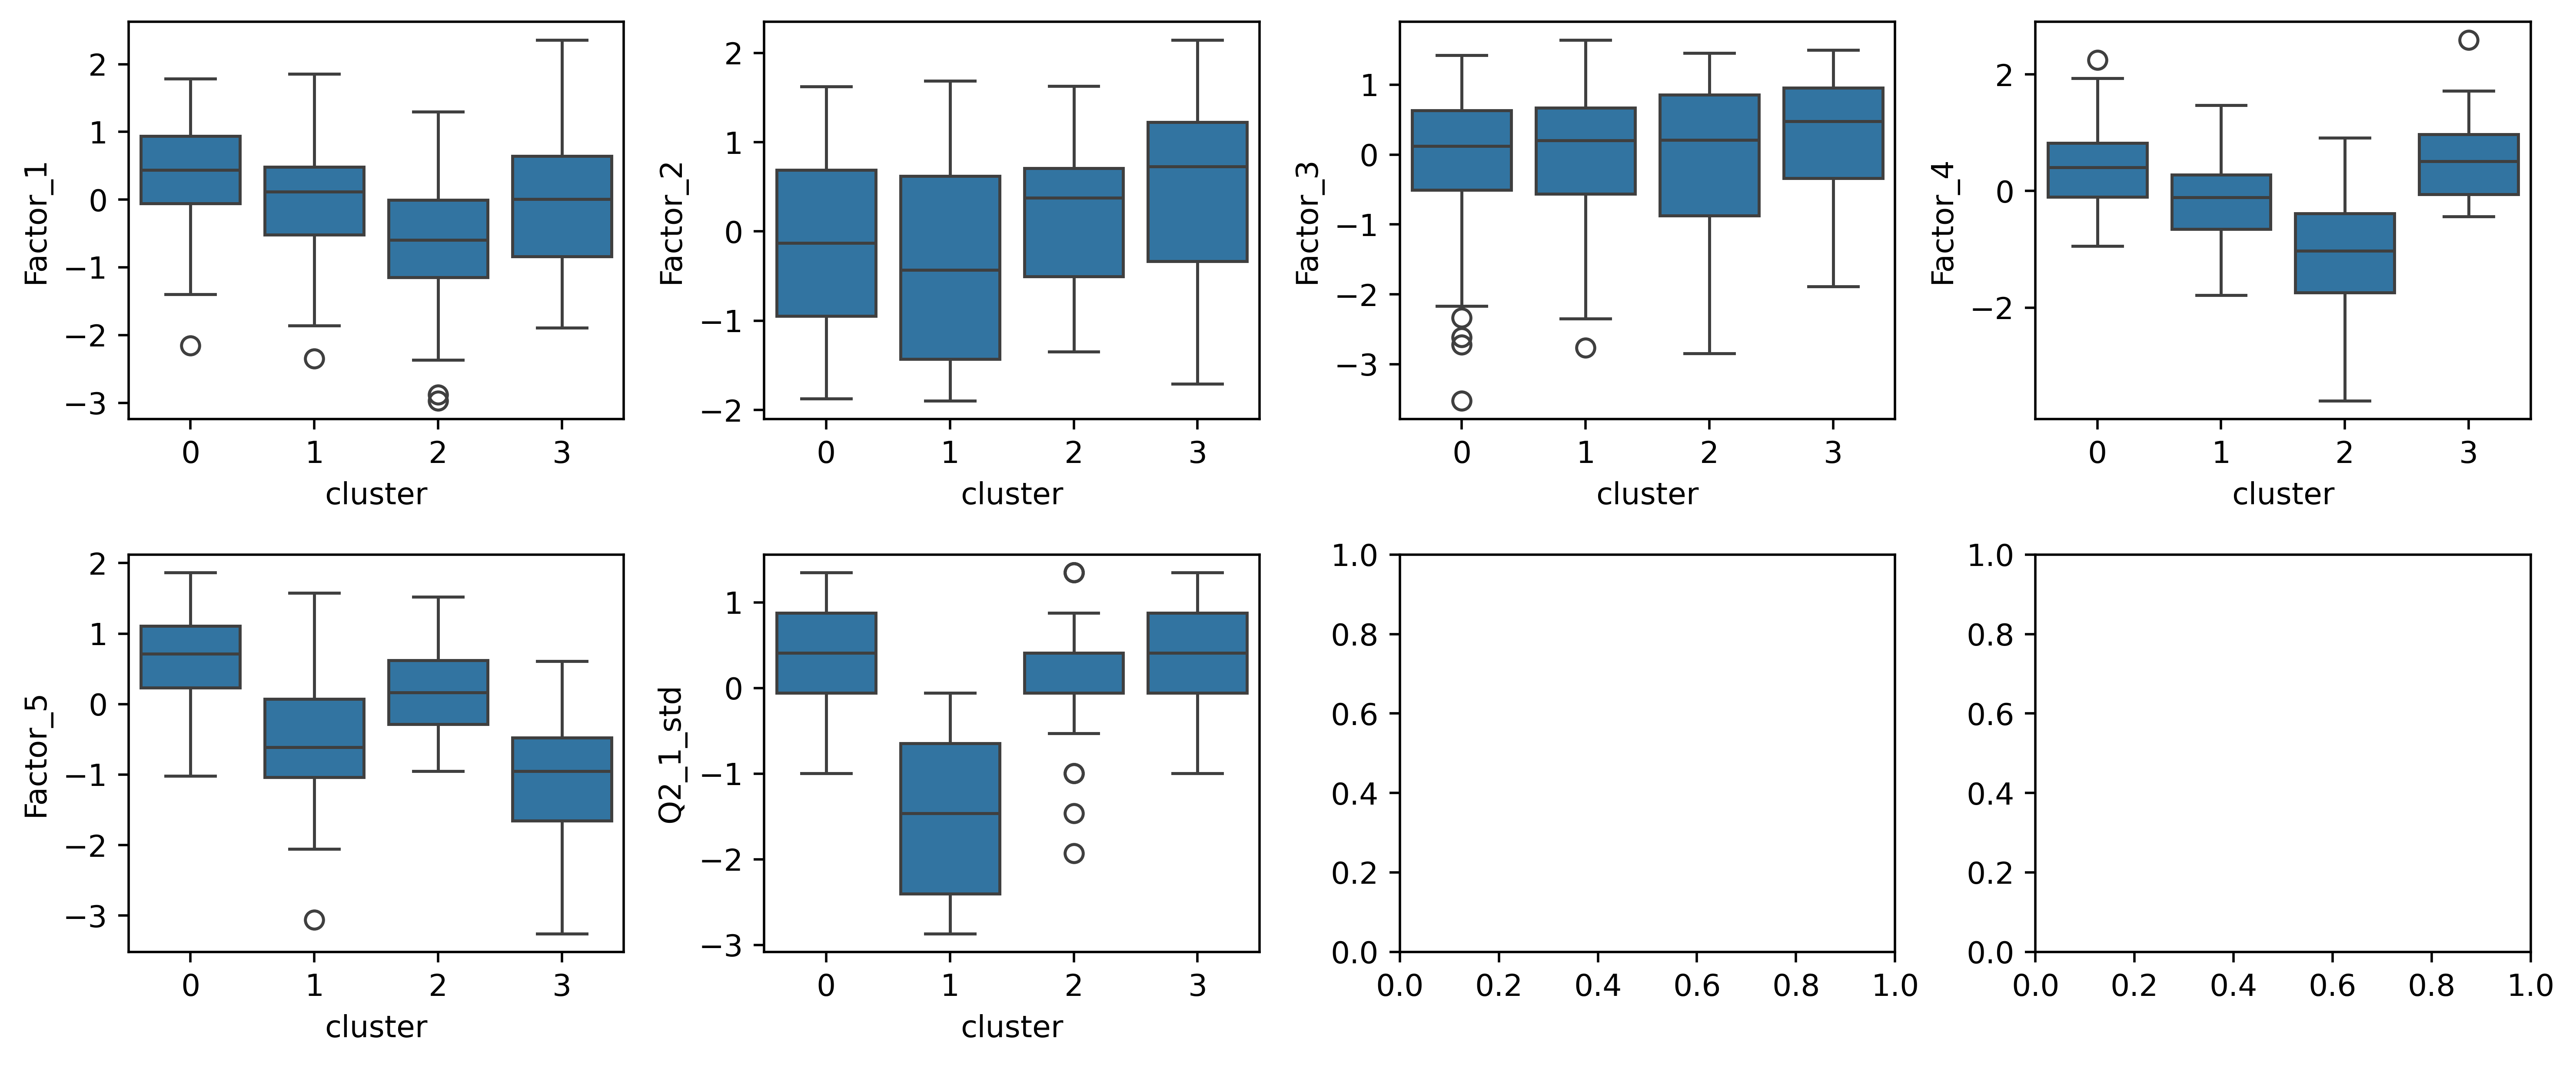

In [218]:
fig, axes = plt.subplots(2,4,figsize=(12,5))
plt.rcParams['figure.dpi'] =1000
for var, ax in zip(vars, axes.flatten()):
    sb.boxplot(x="cluster_km", y=var, data=transformed_df, orient='v', ax=ax)
    ax.set(xlabel="cluster")
fig.tight_layout()

In [219]:
clusters_summary = transformed_df.groupby("cluster_km").mean()
display(clusters_summary)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Q2_1_std
cluster_km,,,,,,
0,0.392234,-0.157250,-0.086088,0.408699,0.665127,0.417799
1,-0.019314,-0.394732,-0.033545,-0.105425,-0.499161,-1.490510
2,-0.657231,0.196728,-0.044462,-1.113698,0.153806,0.171297
3,-0.019325,0.505366,0.277630,0.600599,-1.127991,0.411291


In [220]:
clusters_summary.to_csv('clusters_summary_v2.csv')

In [221]:
clusters_summary.shape


(4, 6)

In [222]:
categories = ['Cinema Ambience', 'Language Problem', 'Price', 'Time', 'No OV Cinema']
len(categories)

5

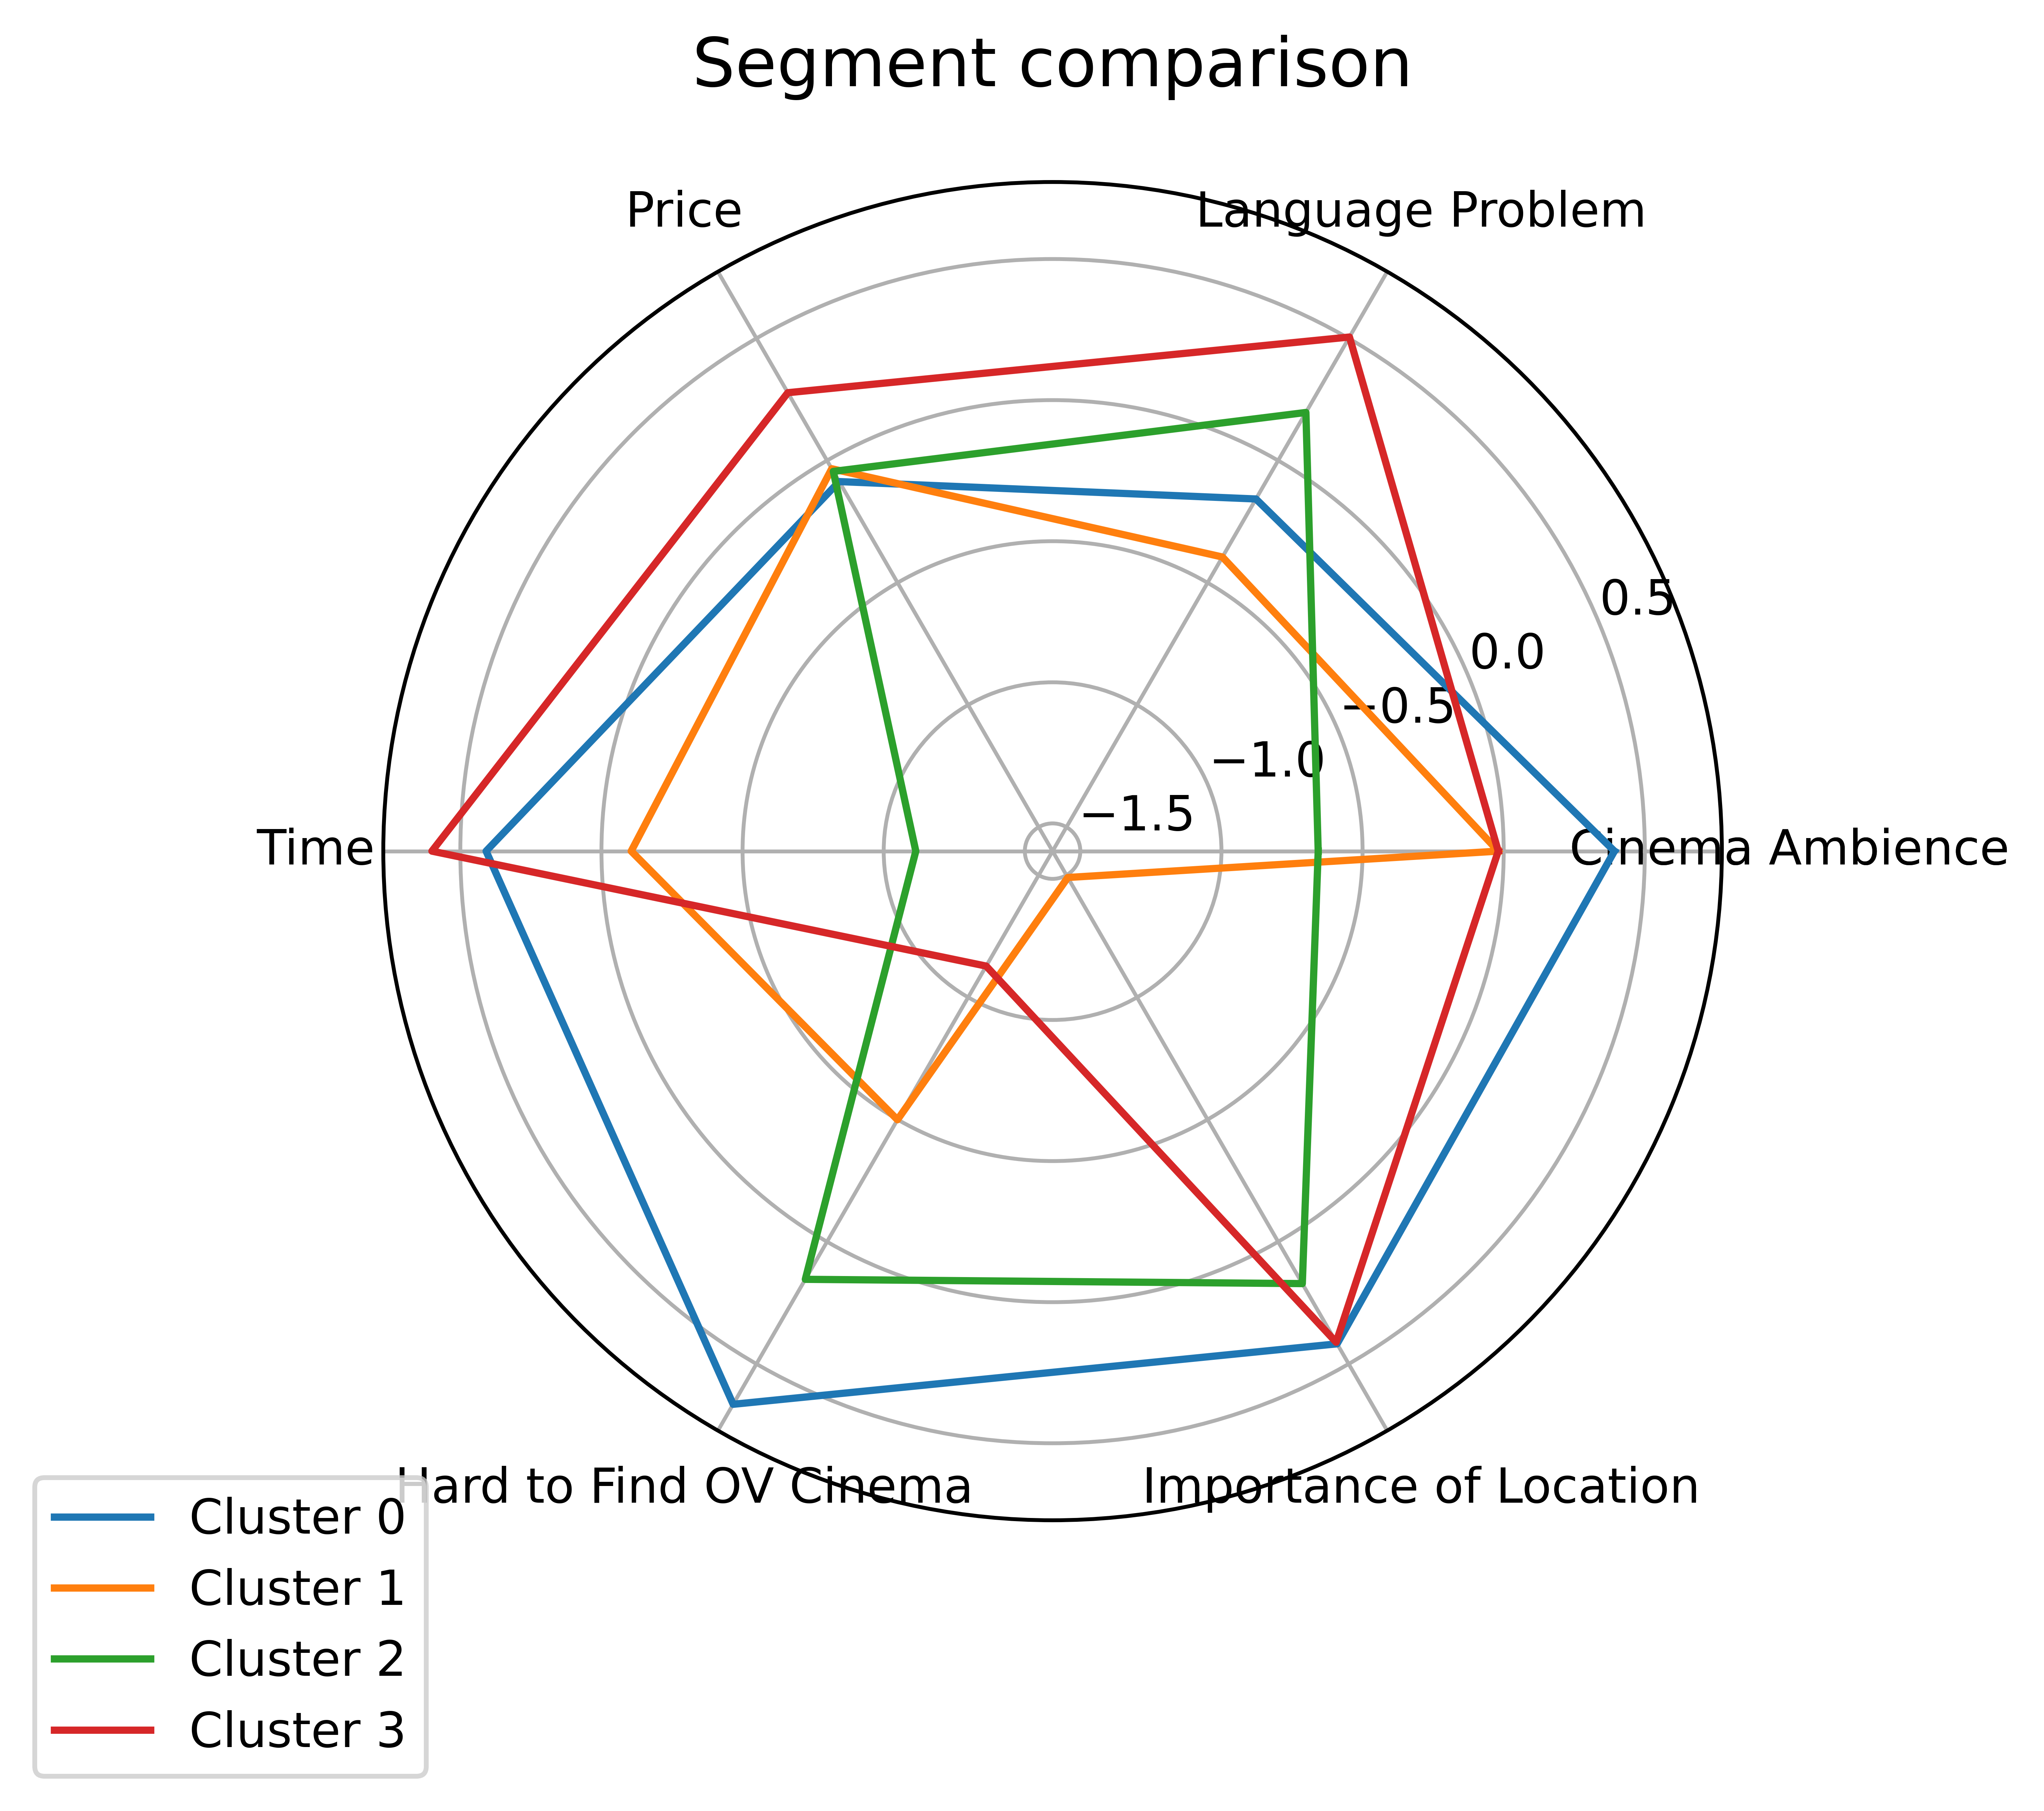

<Figure size 6400x4800 with 0 Axes>

In [223]:
categories = ['Cinema Ambience', 'Language Problem', 'Price', 'Time', 'Hard to Find OV Cinema',"Importance of Location"]
#aggiungo l'ultimo valore uguale al primo per "chiudere il cerchio"
categories = [*categories, categories[0]]
cluster_0 = [*clusters_summary.iloc[0], clusters_summary.iloc[0,0]]
cluster_1 = [*clusters_summary.iloc[1], clusters_summary.iloc[1,0]]
cluster_2 = [*clusters_summary.iloc[2], clusters_summary.iloc[2,0]]
cluster_3 = [*clusters_summary.iloc[3], clusters_summary.iloc[3,0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=7)

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, cluster_0, label='Cluster 0')
plt.plot(label_loc, cluster_1, label='Cluster 1')
plt.plot(label_loc, cluster_2, label='Cluster 2')
plt.plot(label_loc, cluster_3, label='Cluster 3')

plt.title('Segment comparison', size=14, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.05, 0.05))
plt.show()

transformed_df["cluster_km"].value_counts(normalize=True)

# Save the plot to a file
output_path = 'segment_comparison.png'
plt.savefig(output_path, format='png')

In [224]:
transformed_df["cluster_km"].value_counts(normalize=True)

cluster_km
0    0.400000
2    0.227778
1    0.188889
3    0.183333
Name: proportion, dtype: float64

Cluster 0 (blu): 'dubbed movie best friends' (40% of the entire sample) 

				Le persone di questo cluster sono amanti del cinema e danno importanza alla location e all'ambiente del cinema, non hanno problemi linguistici, ma ritengono che sia molto difficile trovare cinema dove vedere OV movie

         
Cluster 1 (arancione): 'quite interesting in cinema' (22% of the entire sample)

                Le persone di questo cluster ritengono sia facile trovare OV cinema, non danno importanza alla location e al timetable del cinema
                
Cluster 2 (verde): '' (18% of the entire sample)

				orari a cazzo
Cluster 3 (rosso): 'Cagacazzo' (18% of the entire sample)

    			Le persone di questo cluster hanno problemi linguistici, probabilmente non andanno mai a vedere un film OV, pagano poco


     


In [225]:
# Mapping dictionary
cluster_mapping = {
    0: "dubbed movie best friends",
    1: "quite interesting in cinema",
    2: "Orari a cazzo",
    3: "I cagacazzo non istruiti"
}

# Replace the values in the 'cluster_km' column
transformed_df['cluster'] = transformed_df['cluster_km'].replace(cluster_mapping)

transformed_df["cluster"].value_counts(normalize=True, dropna=False)

cluster
dubbed movie best friends      0.400000
Orari a cazzo                  0.227778
quite interesting in cinema    0.188889
I cagacazzo non istruiti       0.183333
Name: proportion, dtype: float64

In [234]:
## TEST FOR DIFFERENCIES IN OTHER VARIABLES
#First, add the variables we want to observe (how are they distributed in clusters?)

transformed_df_ = (
    transformed_df
    .join(survey[[
        'Q1',
        "Q13",
        'Q18', 
        'Q20', 
        'Q21', 
        "Q8",
        'Q23',
        "Q16_1",
        "Q19"
        ]])
)


In [227]:
# Gender #
contingency_table = pd.crosstab(transformed_df_.Q18, transformed_df_.cluster)
chi_sq_test(contingency_table)
contingency_table

# se p-value <0.05 dipendenti, ha senso tenerlo in considerazione

p-value 0.2652093816119881
Independent (fail to reject H0)


cluster,I cagacazzo non istruiti,Orari a cazzo,dubbed movie best friends,quite interesting in cinema
Q18,,,,
1.0,17,23,28,18
2.0,16,18,44,16


In [228]:
# Country #
contingency_table = pd.crosstab(transformed_df_.Q20, transformed_df_.cluster)
chi_sq_test(contingency_table)
contingency_table

# se p-value <0.05 dipendenti, ha senso tenerlo in considerazione

p-value 0.19983362752426084
Independent (fail to reject H0)


cluster,I cagacazzo non istruiti,Orari a cazzo,dubbed movie best friends,quite interesting in cinema
Q20,,,,
1.0,27,26,54,31
2.0,4,7,9,1
3.0,2,8,5,1
4.0,0,0,1,0
5.0,0,0,2,0
6.0,0,0,1,0
7.0,0,0,0,1


In [229]:
# University #
contingency_table = pd.crosstab(transformed_df_.Q21, transformed_df_.cluster)
chi_sq_test(contingency_table)
contingency_table

# se p-value <0.05 dipendenti, ha senso tenerlo in considerazione

p-value 0.008223540064608873
Dependent (reject H0)


cluster,I cagacazzo non istruiti,Orari a cazzo,dubbed movie best friends,quite interesting in cinema
Q21,,,,
1.0,9,22,22,7
2.0,15,11,18,15
3.0,9,8,32,12


In [230]:
# Spend per motnh #
contingency_table = pd.crosstab(transformed_df_.Q23, transformed_df_.cluster)
chi_sq_test(contingency_table)
contingency_table

# se p-value <0.05 dipendenti, ha senso tenerlo in considerazione

p-value 0.01253133755957582
Dependent (reject H0)


cluster,I cagacazzo non istruiti,Orari a cazzo,dubbed movie best friends,quite interesting in cinema
Q23,,,,
1.0,12,10,24,16
2.0,13,19,20,13
3.0,6,5,12,2
4.0,1,7,5,0
5.0,1,0,11,3


In [231]:
# Spend per motnh #
contingency_table = pd.crosstab(transformed_df_.Q16_1, transformed_df_.cluster)
chi_sq_test(contingency_table)
contingency_table

# se p-value <0.05 dipendenti, ha senso tenerlo in considerazione

p-value 0.626837014937722
Independent (fail to reject H0)


cluster,I cagacazzo non istruiti,Orari a cazzo,dubbed movie best friends,quite interesting in cinema
Q16_1,,,,
1.0,0,0,1,2
3.0,0,0,1,0
4.0,1,1,1,0
5.0,0,2,2,2
6.0,4,4,5,5
7.0,13,10,16,10
8.0,11,14,26,11
9.0,2,9,15,4
10.0,2,1,5,0


In [232]:
# Spend per motnh #
contingency_table = pd.crosstab(transformed_df_.Q13, transformed_df_.cluster)
chi_sq_test(contingency_table)
contingency_table

# se p-value <0.05 dipendenti, ha senso tenerlo in considerazione

p-value 0.07695154503470016
Independent (fail to reject H0)


cluster,I cagacazzo non istruiti,Orari a cazzo,dubbed movie best friends,quite interesting in cinema
Q13,,,,
1.0,22,30,61,22
2.0,11,11,11,12


In [235]:
# Spend per motnh #
contingency_table = pd.crosstab(transformed_df_.Q19, transformed_df_.cluster)
chi_sq_test(contingency_table)
contingency_table

# se p-value <0.05 dipendenti, ha senso tenerlo in considerazione

p-value 0.4275603372904619
Independent (fail to reject H0)


cluster,I cagacazzo non istruiti,Orari a cazzo,dubbed movie best friends,quite interesting in cinema
Q19,,,,
18.0,0,1,2,0
19.0,2,5,10,3
20.0,7,6,12,3
21.0,12,6,16,10
22.0,5,7,14,6
23.0,3,6,8,5
24.0,2,4,5,3
25.0,1,1,5,2
26.0,0,3,0,0
